# Comparison of the fire rate of spread in WRF-SFIRE and FARSITE
## Jan Mandel, instructor of MATH 4770 Math Clinic 
## University of Colorado Denver
## December 2021

## Background

### The wind speed vector and the slope vector

The wind speed is a vector. We can write the wind vector in Cartesian coordinates as $$\vec{w}=(w_x,w_y)\quad \text{(m/s)}.$$ The $x,y$ axes can be, e.g., east-west and south-north, but that is not important here.

The slope is also a vector. Denote by $z=z(x,y)$ the terrain height, e.g., above the sea level. The slope vector is the gradient of the terrain height, $$\vec{s}=\left(\frac{\partial z}{\partial x},\frac{\partial z}{\partial y}\right)\quad\text{(m/m})$$.

***Explain how is the slope referred to as $\tan \phi = \|\vec{s}\|$. This might be best done with a 3D picture.***

### Rothermel formula

***Explain Rothermel's formula for fire rate of spread (ROS) here. You can write it in a form $R_0$ times 1+wind factor(wind speed)+slope factor(slope), without the details how are the wind factor and the slope factor computed. Include your code for Rothermel formula***

But the Rothermel formula is one dimensional - it assumes that the directions of the fire propagation, the wind, and the slope are the same. That is, that the three vectors are aligned. We will compare two approaches to extending the Rothermel formula to 2D fire propagation, in FARSITE and in WRF-SFIRE.

### Fire propagation by the ellipsoid method in FARSITE

Richards (1990) and FARSITE (Finney, 2000) assume that fire spreads to an ellipsoid with axes $a$ and $b$, with the fire starting from a point at distance $c$ on the $b$-axis from the center of the ellipse. The $b$ axis is the direction of the maximal Rate of Spread (ROS), which equals to $b+c$, and is computed from the Rothermel formula. Richards (1990) considers only the wind and zero slope, then the direction of the maximal rate of spread is the wind direction. FARSITE computes a "resultant vector" from the slope and wind vectors, which it then substitutes into the Rothermel formula. To find and reproduce how are the computations of the slope and of the resultant vector done is the heart of the project.

***Add formulas how are $a,b,c$ computed in the ellipsoid method using the Rothermel formula, from FARSITE manual and Richards (1990).. Add formulas what are the numbers substituted into the Rothermel formula and how they are computed from the wind vector and the slope vector. This includes computation of the "resultant vector" in FARSITE.***

When the fire propagates from a fireline, the ellipsoid method considers it as starting from all points on the fireline, and the new fireline is then the envelope of the ellipsoids on the side in the propagation direction.

***Add a picture of the envelope following Richards or FARSITE manual here. Note that their fireline is curved while the discussion here is for a straight fireline segment, you will need to draw your own for copyright reasons anyway***

***Divide into subsections and code as appropriate***

### Fire propagation in WRF-SFIRE

WRF-SFIRE (Mandel et al., 2009, 2011) works with ROS in the direction of the normal to the fireline, and applies Rothermel's formula along the normal. That is, it substitutes in the Rothermel formula the wind speed projected on the normal (i.e., multiplied by the cosine of the wind vector and the normal vector), and the slope (i.e, slope of the gradient of the terrain height) also projected on the normal (i.e., multiplied by the cosine of the slope direction in the horizontal plane and the normal vector). WRF-SFIRE also includes modifications to impose a minimum lateral and backing fire spread.

## Methods

To compare the fire propagation in WRF-SFIRE and FARSITE, we will find the ROS in the direction normal to the fireline that is equivalent to the propagation of the same fireline in the FARSITE ellipsoid method.

<img src="http://math.ucdenver.edu/~jmandel/data/math4779f21/ellipsoid_ros2.png" width=500  align="center"/>

### Computing the rate of spread in the direction normal to the fireline from the fire propagation ellipsoid

Write the equation of an ellipse with horizontal axis $a$ and vertical axis
$b$ in parametric form
$$
\left[
\begin{array}
[c]{c}
x\\
y
\end{array}
\right]  =\left[
\begin{array}
[c]{c}
a\cos s\\
b\sin s
\end{array}
\right] 
$$
with angle parameter $s$. Rotate by an angle $\theta$,
$$
\left[
\begin{array}
[c]{c}
x\\
y
\end{array}
\right]  =\left[
\begin{array}
[c]{cc}
\cos\theta & \sin\theta\\
-\sin\theta & \cos\theta
\end{array}
\right]  \left[
\begin{array}
[c]{c}
a\cos s\\
b\sin s
\end{array}
\right]  ,
$$
and multiply out we get
$$
\left[
\begin{array}
[c]{c}
x\\
y
\end{array}
\right]  =\left[
\begin{array}
[c]{c}
a\cos\theta\cos s+b\sin\theta\sin s\\
-a\sin\theta\cos s+b\cos\theta\sin s
\end{array}
\right]  .
$$
Move the center vertically so that the point at distance $c$ from the center
along the $b$ axis is at $y=0$,
$$
\left[
\begin{array}
[c]{c}
x\\
y
\end{array}
\right]  =\left[
\begin{array}
[c]{c}
a\cos\theta\cos s+b\sin\theta\sin s\\
-a\sin\theta\cos s+b\cos\theta\sin s+c\cos\theta
\end{array}
\right]
$$
This is the equation of the ellipse from the figure. The rate of spread in the
direction of the normal equivalent to the ellipse is the distance of the
horizontal lines at $y=0$ and tangent to the top of the rotated shifted
ellipse
$$
R=\max_{s}-a\sin\theta\cos s+b\cos\theta\sin s+c\cos\theta
$$
The find the highest point, set
$$
y^{\prime}\left(  s\right)  =\frac{\partial}{\partial s}\left(  -a\sin
\theta\cos s+b\cos\theta\sin s+c\cos\theta\right)  =0,
$$
which gives
$$
a\sin\theta\sin s+b\cos\theta\cos s=0
$$
We can divide by $\sin\theta\neq0$,
$$
\frac{\sin s}{\cos s}+\frac{b}{a}\frac{\cos\theta}{\sin\theta}=0,
$$
and compute $s$ from
$$
s=-\arctan\left(  \frac{b\cos\theta}{a\sin\theta}\right)
$$
Using the arctan2 function in numpy
$$
s=-\text{arctan2}\left(  b\cos\theta,a\sin\theta\right)
$$
gives the correct result even for $\sin\theta=0.$ In any case, we get two solutions, $s$
and $s+\pi$, plus an integer multiple of $2\pi$,  substitute in the equation of the ellipse
$$
y=-a\sin\theta\cos s+b\cos\theta\sin s+c \cos\theta
$$
and take the larger value:
$$
R=\max\left\{  u,-u\right\}  +c \cos\theta,\quad u=-a\sin\theta\cos
s+b\cos\theta\sin s.
$$


### The code

The code to compute $R$ from $a,b,c,\theta$ turns out to be just three lines.

In [ ]:
import numpy as np
def ros_n(a,b,c,theta):
  # compute fire rate of spread in the direction normal to the fireline for fire
  # propagating according the the ellipsoid method with coefficients a, b, c 
  # and the main axis of the ellipsoid at angle theta from the normal
  
  s = -np.arctan2(b*np.cos(theta),a*np.sin(theta))
  u = -a*np.sin(theta)*np.cos(s) + b*np.cos(theta)*np.sin(s)
  R = np.maximum(u,-u) + c*np.cos(theta)
  return R


## Results

### Visualization

If it's not programmed and if it doesn't work it's just a fantasy. Let's draw some pictures to verify.

#### Visualization code

In [ ]:
import matplotlib.pyplot as plt 
def plot_ros(a,b,c,theta):
  r=ros_n(a,b,c,theta)
  def xe(s):   # x coordinate of point on the ellipse
    return a*np.cos(theta)*np.cos(s) + b*np.sin(theta)*np.sin(s)
  def ye(s):   # c coordinate of point on the ellipse
    return -a*np.sin(theta)*np.cos(s) + b*np.cos(theta)*np.sin(s) + c*np.cos(theta)
  def cline(t,m): # plot line through the center at angle t
    plt.plot([xe(t), xe(t+np.pi)], [ye(t), ye(t+np.pi)],marker='o',linestyle='-.',c=m)
  %matplotlib inline
  plt.figure(figsize=(8,8))
  s=np.linspace(0,2*np.pi,1000)  # parameter
  x = xe(s)
  y = ye(s)
  plt.plot(x,y,      linestyle='--',c='r',label='fire propagation ellipsoid at t=1s')
  cline(0.0,'b')
  cline(np.pi/2,'r')
  xx=np.linspace(-b,b,100)
  oo=np.ones(100)
  plt.plot(xx,oo*r,  linestyle='-',c='k',label='fireline at t=1s')
  plt.plot(xx,oo*0.0,linestyle='--',c='k',label='fireline at t=0s')
  plt.ylabel('fire traveled in normal direction (m)')
  plt.title('Normal ROS %s m/s for ellipsoid with a=%s m/s b=%s m/s c=%s m/s at %s rad angle' 
            % (np.round(r,decimals=4),a,b,c,np.round(theta,decimals=4)))
  plt.axis('equal')
  plt.legend()



#### Pictures

No wind no slope:

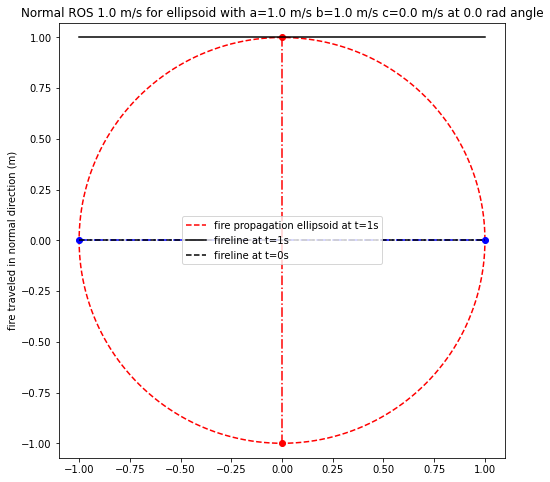

In [ ]:
plot_ros(1.0,1.0,0.0,0.0)

##### Direction of the propagation of the fireline (the normal to the fireline) is the same as the maximum spread direction:

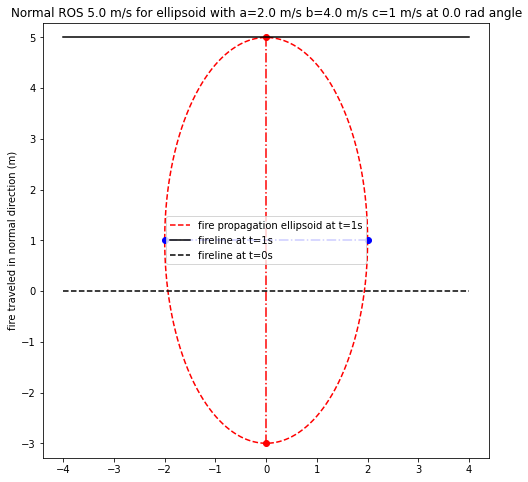

In [ ]:
plot_ros(2.0,4.0,1,0.0)

When $\theta=0$, the ROS in the ellipsoid method and the ROS in the normal direction as the same.

##### The maximum ROS in the ellipsoid method at an angle to the normal direction:

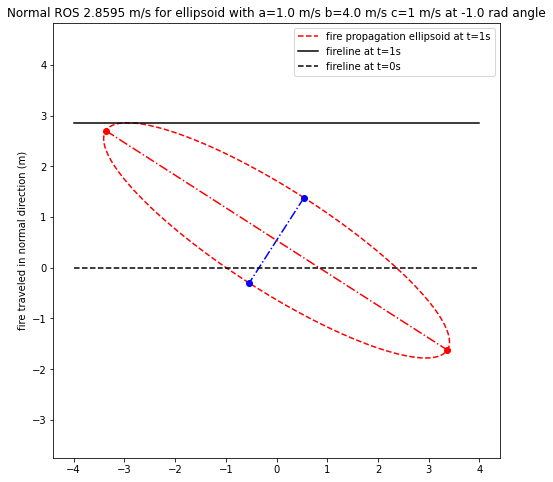

In [ ]:
plot_ros(1.0,4.0,1,-1.0)

Here, the ROS in the normal direction is *smaller* than the maximum ROS from the ellipsoid method.

##### The case when the the axes $a=b$ in the ellipsoid method and at angle to the fireline:

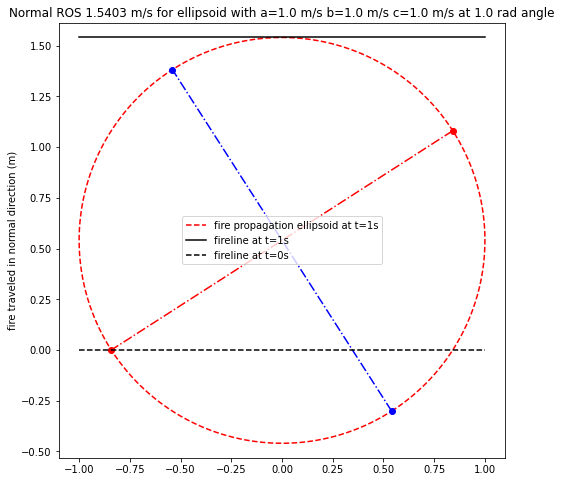

In [ ]:
plot_ros(1.0,1.0,1.0,1.0)

##### The case when the maximum ROS in the ellipsoid method is backwards to the propagation of the fireline

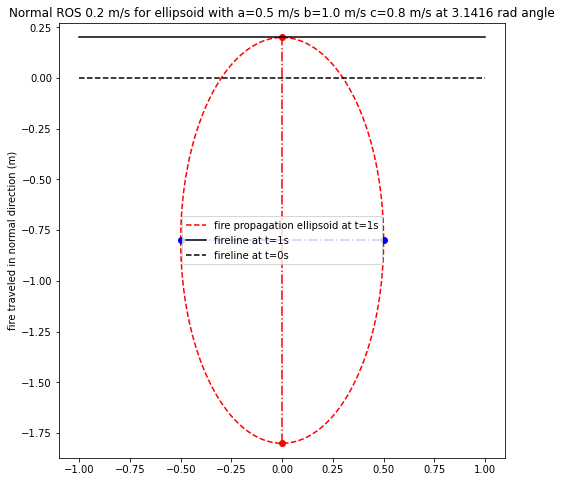

In [ ]:
plot_ros(0.5,1.0,0.8,np.pi)

So $b-c$ is the *backing ROS* - the speed with which fire propagates backwards.

##### An example when the maximum ROS in the ellipsoid method points backwards at an angle:

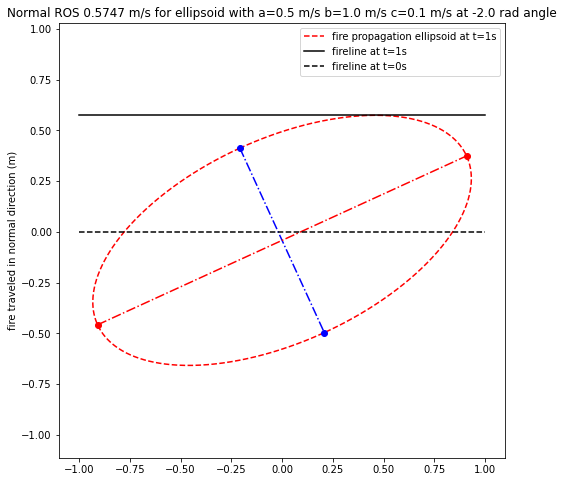

In [ ]:
plot_ros(0.5,1.0,0.1,-2.0)

##### The case when the maximum ROS in the ellipsoid method is aligned with the fireline:

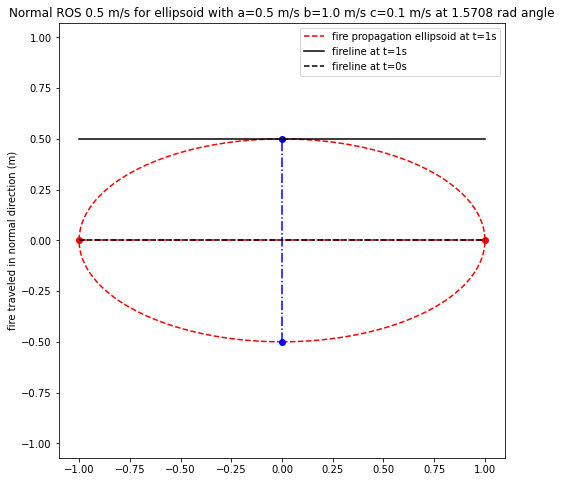

In [ ]:
plot_ros(0.5,1.0,0.1,np.pi/2)

So $a$ becomes the *lateral ROS* - the speed how a fire propagates sidewise.

## Results

***Add your comparison here. It would be based on a code that takes as input the fuels, wind vector $\vec{w}$, slope vector $\vec{s}$, and the normal vector to the fireline $\vec{n}$ pointing in the direction of fire propagation. It would compute $a,b,c,\theta$ for the FARSITE ellipsoid method. Then use the code above to compute the equivalent ROS in the normal direction, and compare with the ROS in the normal direction used in WRF-SFIRE.***

***As discussed in class, the comparison can have some tables, and graphs where you keep everything constant except one quantity. For example,***

***wind pointing in the normal direction, zero slope, vary wind speed (similar as in [WRF-SFIRE guide](https://wiki.openwfm.org/wiki/How_to_diagnose_fuel_properties_in_WRF-SFIRE#Diagnostics_provided)*** 

***constant wind and slope vectors, vary the normal direction (use polar plot) (particularly interesting)***

***constant wind speed, zero slope, vary wind direction (use polar plot)***

***constant wind speed, constant nonzero slope vector, vary wind direction (use polar plot)***

***etc.***